#### 1. Data Processing:

In [176]:
# a) Import the data
import pandas as pd
import numpy as np
Train = pd.read_csv('train_data.csv')
Test = pd.read_csv('test_data.csv')

In [177]:
Train.shape

(507, 148)

In [178]:
Test.shape

(168, 148)

In [179]:
# b) Remove any rows that have missing data across both sets of data.
Train.dropna(how='any',inplace=True)
Test.dropna(how='any',inplace=True)

In [180]:
# c) The target variable (dependent variable) is called "class", make sure to separate this out into a "y_train" and "y_test" and remove from your "X_train" and "X_test".
X_train=Train.drop(columns=['class'])
y_train=Train['class']
X_test=Test.drop(columns=['class'])
y_test=Test['class']

In [181]:
# d) Scale all features / predictors (NOT THE TARGET VARIABLE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_train.shape

(507, 147)

In [182]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test=scaler.transform(X_test)
X_test.shape

(168, 147)

#### 2. Random Forest Classifier - Base Model:

In [21]:
# a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [22]:
#b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes
y_pred_rf = rnd_clf.predict(X_test)
y_pred_proba_rf=rnd_clf.predict_proba(X_test)

In [23]:
# c) Calculate the confusion matrix and classification report for the test data. 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[14,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 22,  0,  2,  0,  0,  0,  0,  0],
       [ 1,  1, 13,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  4],
       [ 1,  0,  1,  0,  0, 13,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0, 13,  0,  0],
       [ 0,  1,  0,  5,  3,  0,  0,  5,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0, 15]])

In [25]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

    asphalt        0.70      1.00      0.82        14
   building        0.76      0.88      0.81        25
        car        0.93      0.87      0.90        15
   concrete        0.69      0.78      0.73        23
      grass        0.86      0.86      0.86        29
       pool        1.00      0.87      0.93        15
     shadow        1.00      0.81      0.90        16
       soil        1.00      0.36      0.53        14
       tree        0.79      0.88      0.83        17

    accuracy                           0.82       168
   macro avg       0.86      0.81      0.81       168
weighted avg       0.85      0.82      0.82       168



In [26]:
# d)  Calculate predictions for the training data & build the classification report & confusion matrix. 
y_pred_rf_train = rnd_clf.predict(X_train)
y_pred_proba_rf_train =rnd_clf.predict_proba(X_train)

In [27]:
# Build the confusion matrix
confusion_matrix(y_train, y_pred_rf_train)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 97,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 93,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 83,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 89]])

In [28]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_rf_train))

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        1.00      1.00      1.00        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      1.00      1.00        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        1.00      1.00      1.00        89

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507



######  Are there signs of overfitting? Why or why not?
The Model is showing a sign of overfitting since the accuracy between training data and testing data are huge. The weighted avg precision on training dataset is 1 while the weighted avg precision on test dataset is 0.85.
It shows the low bias and high variance of the model(Overfitting).

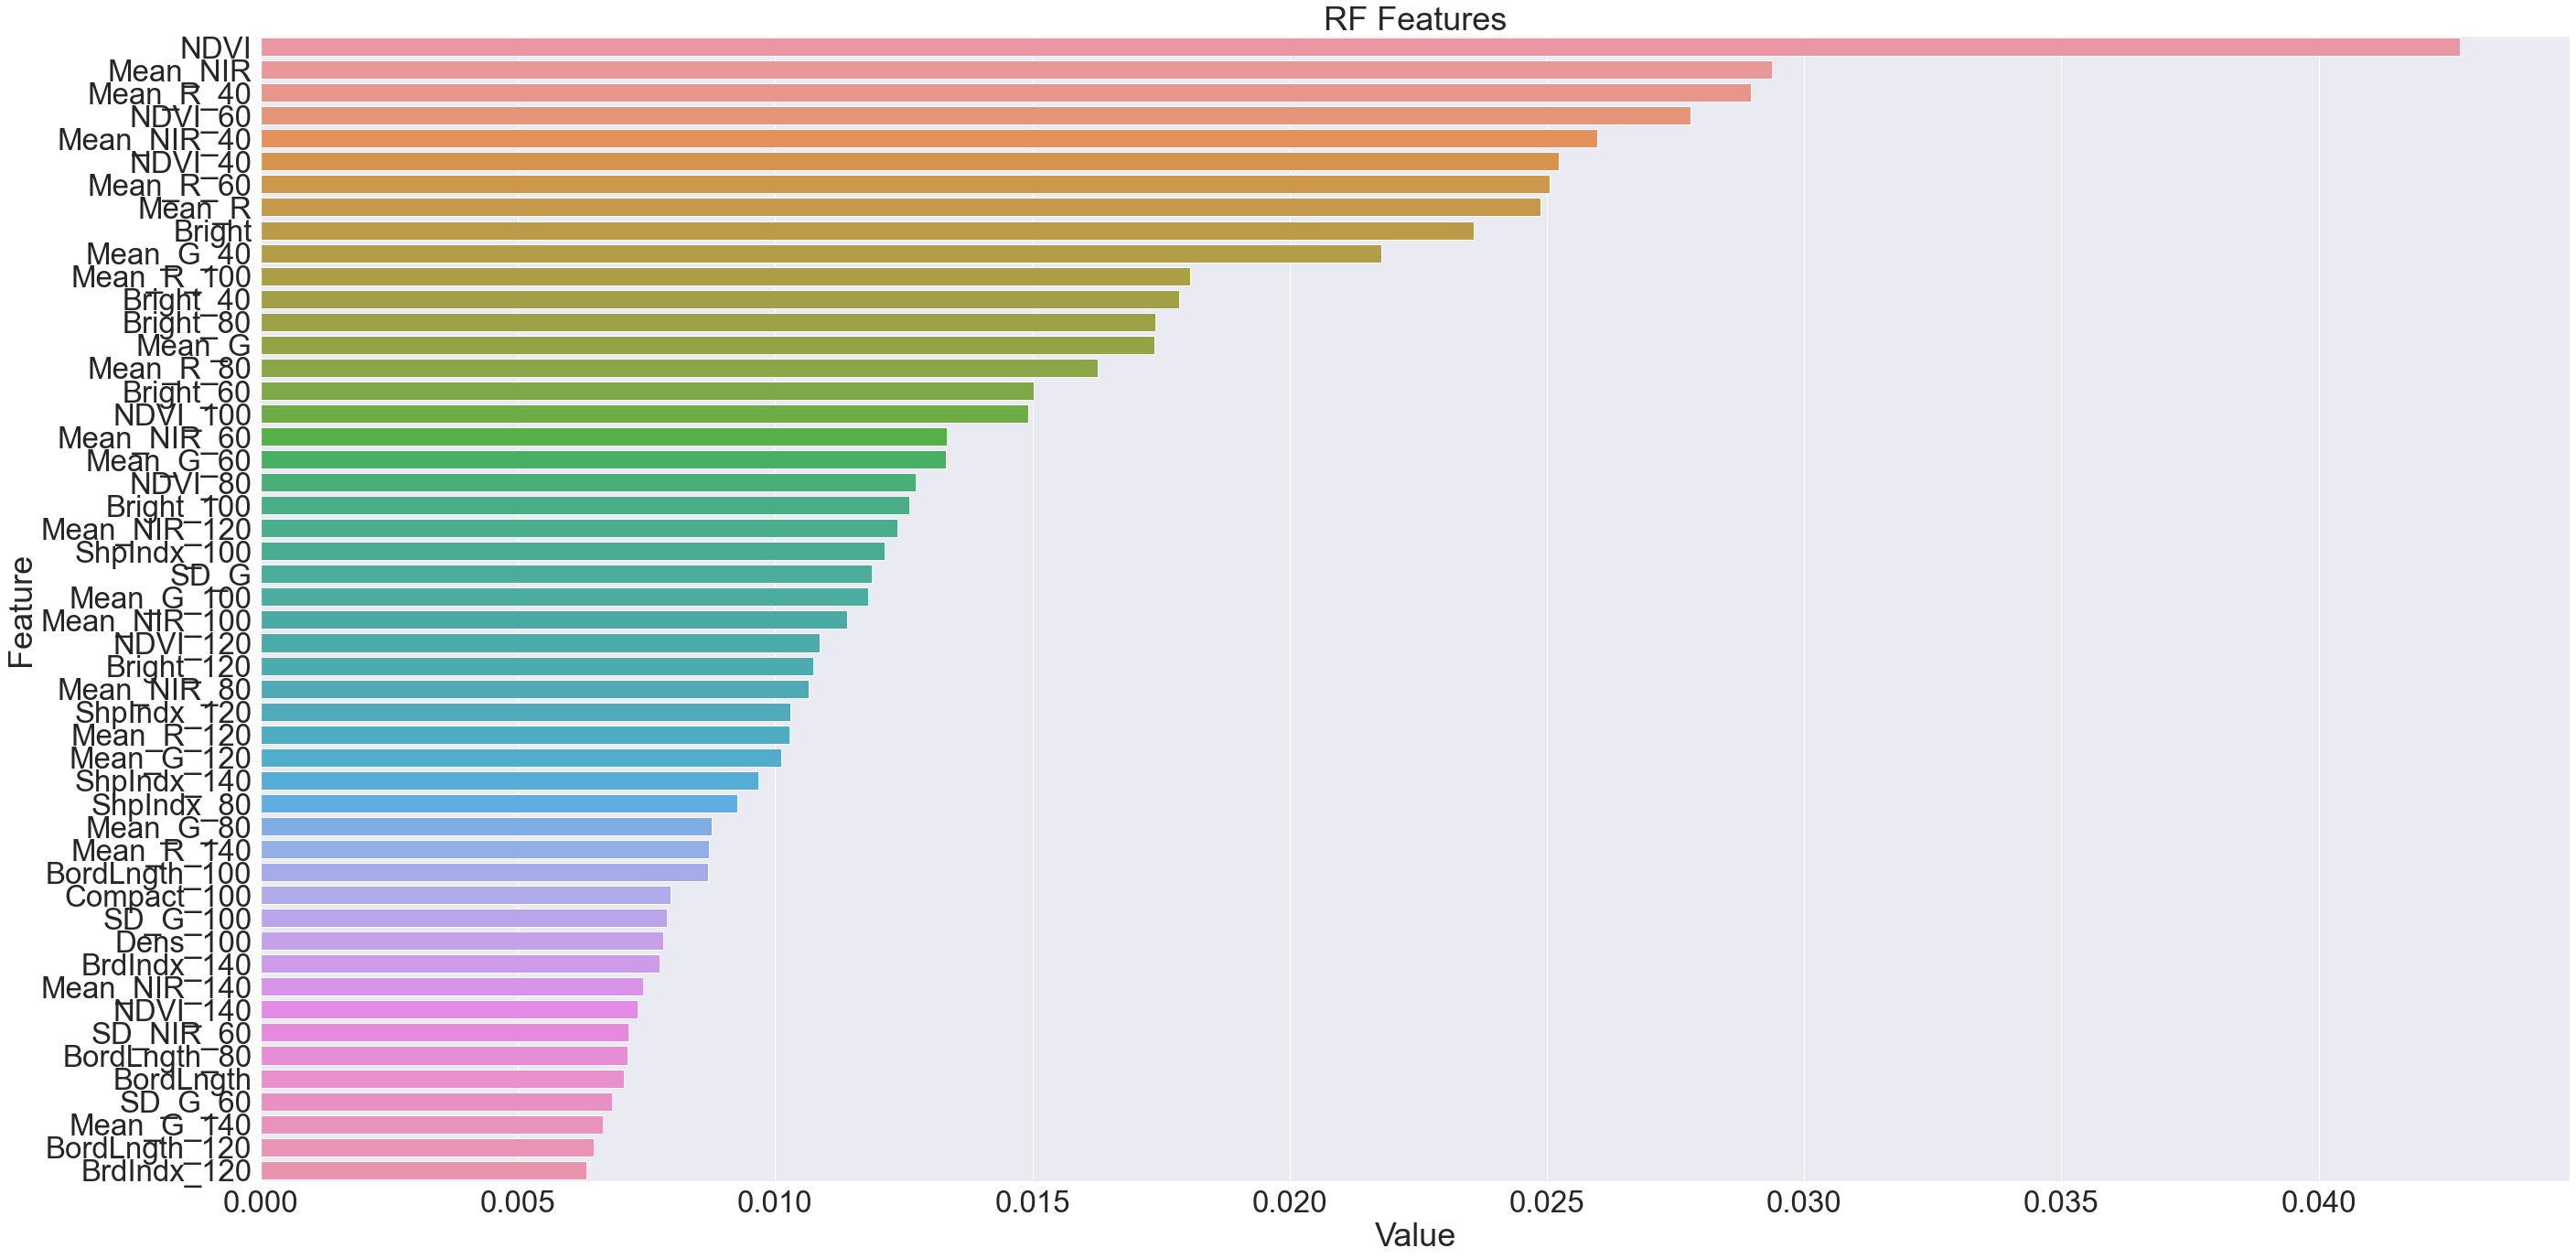

In [30]:
# e) Identify the top 5 features. Feel free to print a list OR to make a plot.
import matplotlib.pyplot as plt
import seaborn as sns
feature_imp = pd.DataFrame({'Value':rnd_clf.feature_importances_,'Feature':X_train.columns})
plt.figure(figsize=(40, 20))
sns.set(font_scale = 3)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:50])
plt.title('RF Features')
plt.tight_layout()
plt.show()

# The top 5 features are NDVI,Mean NIR,Mean R 40,NDVI-60,NDVI-40

#### 3. LinearSVM Classifier - Base Model:

In [31]:
# a) Use the LinearSVC in sklearn. Fit your model on the training data.
from sklearn.svm import LinearSVC
LinearSVC_clf = LinearSVC(random_state=42)
LinearSVC_clf.fit(X_train, y_train)

/Users/yangxiang/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [36]:
# b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.
y_pred_LinearSVC = LinearSVC_clf.predict(X_test)

In [37]:
# c) Calculate the confusion matrix and classification report for test data.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_LinearSVC)

array([[ 2,  1,  0,  0, 11,  0,  0,  0,  0],
       [ 0, 20,  0,  2,  2,  1,  0,  0,  0],
       [ 0,  5,  8,  1,  0,  0,  1,  0,  0],
       [ 1,  5,  1,  1, 13,  2,  0,  0,  0],
       [ 0,  1,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  4,  1,  0, 10,  0,  0,  0],
       [ 0,  2,  0,  0,  4,  0, 10,  0,  0],
       [ 0,  5,  0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  0,  0,  0, 11]])

In [40]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LinearSVC))

              precision    recall  f1-score   support

    asphalt        0.67      0.14      0.24        14
   building        0.51      0.80      0.62        25
        car        0.62      0.53      0.57        15
   concrete        0.20      0.04      0.07        23
      grass        0.38      0.97      0.55        29
       pool        0.77      0.67      0.71        15
     shadow        0.91      0.62      0.74        16
       soil        0.00      0.00      0.00        14
       tree        1.00      0.65      0.79        17

    accuracy                           0.54       168
   macro avg       0.56      0.49      0.48       168
weighted avg       0.54      0.54      0.48       168



/Users/yangxiang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# d)  Calculate predictions for the training data & build the classification report & confusion matrix. 
y_pred_LinearSVC_train = LinearSVC_clf.predict(X_train)

In [39]:
# Build the confusion matrix
confusion_matrix(y_train, y_pred_LinearSVC_train)

array([[10,  4,  0,  0, 29,  0,  2,  0,  0],
       [ 0, 77,  0,  2, 11,  7,  0,  0,  0],
       [ 0,  2, 17,  0,  2,  0,  0,  0,  0],
       [ 0, 14,  0, 16, 60,  3,  0,  0,  0],
       [ 0,  0,  0,  0, 80,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  1, 12,  0,  0,  0],
       [ 0,  4,  0,  0, 21,  0, 20,  0,  0],
       [ 0,  5,  0,  0, 15,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0, 50]])

In [41]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_LinearSVC_train))

              precision    recall  f1-score   support

    asphalt        1.00      0.22      0.36        45
   building        0.72      0.79      0.75        97
        car        1.00      0.81      0.89        21
   concrete        0.89      0.17      0.29        93
      grass        0.31      0.96      0.47        83
       pool        0.55      0.86      0.67        14
     shadow        0.91      0.44      0.60        45
       soil        0.00      0.00      0.00        20
       tree        0.94      0.56      0.70        89

    accuracy                           0.56       507
   macro avg       0.70      0.54      0.53       507
weighted avg       0.74      0.56      0.54       507



######  Are there signs of overfitting? Why or why not?
The Model is showing a sign of overfitting since the accuracy between training data and testing data are huge. The weighted avg precision on training dataset is 0.70 while the weighted avg precision on test dataset is 0.54.
It shows the low bias and high variance of the model(Overfitting).
But in the real life I will not consider this model since the accuray rate is way too low.

#### 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

In [184]:
import numpy as np

In [185]:
# a) Use SVC from sklearn with kernel = "linear". Run the GridSearchCV using the following (SVMs run much faster than RandomForest):
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#create a dictionary of parameters 
param_grid = {'C':list(np.arange(start=0.01, stop=10, step=0.2))}

# create SVM model 
SVM_L_obj=SVC(kernel='linear')

# Create gridsearch object with various combinations of parameters
SVM_L_Grid = GridSearchCV(SVM_L_obj, param_grid, cv = 5,n_jobs=-1, verbose = 0)
# Fit the GridSearch
SVM_L_Grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...]},
             pre_d

In [186]:
# b) Identify the best performing model:
SVM_L_Grid.best_params_
best_model_SVM_L=SVM_L_Grid.best_estimator_

In [187]:
# c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.
y_pred_SVM_L_Grid = best_model_SVM_L.predict(X_test)

In [188]:
# d) Calculate the confusion matrix and classification report for test data.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_SVM_L_Grid)

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 22,  0,  2,  1,  0,  0,  0,  0],
       [ 0,  1, 14,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0, 19,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1, 25,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0, 13,  1,  0,  0],
       [ 3,  0,  0,  0,  0,  0, 13,  0,  0],
       [ 0,  1,  0,  6,  3,  0,  0,  4,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 16]])

In [189]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_SVM_L_Grid))

              precision    recall  f1-score   support

    asphalt        0.81      0.93      0.87        14
   building        0.79      0.88      0.83        25
        car        1.00      0.93      0.97        15
   concrete        0.66      0.83      0.73        23
      grass        0.86      0.86      0.86        29
       pool        1.00      0.87      0.93        15
     shadow        0.87      0.81      0.84        16
       soil        0.80      0.29      0.42        14
       tree        0.84      0.94      0.89        17

    accuracy                           0.83       168
   macro avg       0.85      0.82      0.81       168
weighted avg       0.84      0.83      0.82       168



In [190]:
# e)  Calculate predictions for the training data & build the classification report & confusion matrix.
y_pred_SVM_L_Grid_train = best_model_SVM_L.predict(X_train)

In [191]:
# Build the confusion matrix
confusion_matrix(y_train, y_pred_SVM_L_Grid_train)

array([[40,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 2, 87,  0,  7,  0,  0,  1,  0,  0],
       [ 0,  1, 19,  1,  0,  0,  0,  0,  0],
       [ 0,  9,  0, 83,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 70,  0,  0,  0, 12],
       [ 0,  1,  0,  0,  1, 12,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 43,  0,  1],
       [ 0,  3,  0,  4,  2,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  3,  0,  1,  0, 85]])

In [192]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_SVM_L_Grid_train))

              precision    recall  f1-score   support

    asphalt        0.93      0.89      0.91        45
   building        0.85      0.90      0.87        97
        car        1.00      0.90      0.95        21
   concrete        0.87      0.89      0.88        93
      grass        0.91      0.84      0.88        83
       pool        1.00      0.86      0.92        14
     shadow        0.86      0.96      0.91        45
       soil        1.00      0.55      0.71        20
       tree        0.87      0.96      0.91        89

    accuracy                           0.89       507
   macro avg       0.92      0.86      0.88       507
weighted avg       0.89      0.89      0.89       507



######  Are there signs of overfitting? Why or why not?
No, the result after the grid search does not shows a sign of overfitting.
The weighted avg accuracy for training is 0.89 while the weighted avg accuracy for testing is 0.84. The gap is reltively small, it does not shows a trend/sign of overfitting since we see a small drop after apply model on testing dataset. 

#### 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:

In [193]:
# a) Use SVC from sklearn with kernel = "poly". Run the GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#create a dictionary of parameters 
param_grid = {'C':list(np.arange(start=0.01, stop=10, step=0.2)),'degree':[2,3,4,5,6]}

# create SVM model 
SVM_P_obj=SVC(kernel='poly',random_state=42)

# Create gridsearch object with various combinations of parameters
SVM_P_Grid = GridSearchCV(SVM_P_obj, param_grid, cv = 5,n_jobs=-1, verbose = 0,)
# Fit the GridSearch
SVM_P_Grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...],
                       

In [194]:
# b) Identify the best performing model:
best_model_SVM_P=SVM_P_Grid.best_estimator_

In [195]:
best_model_SVM_P

SVC(C=3.81, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [196]:
SVM_P_Grid.best_params_

{'C': 3.81, 'degree': 3}

In [197]:
# c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.
y_pred_SVM_P_Grid = best_model_SVM_P.predict(X_test)

In [198]:
# d) Calculate the confusion matrix and classification report for test data.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_SVM_P_Grid)

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 18,  0,  4,  3,  0,  0,  0,  0],
       [ 0,  2, 11,  0,  0,  1,  0,  1,  0],
       [ 0,  3,  0, 19,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  1,  2],
       [ 0,  4,  0,  0,  0, 10,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 14,  0,  1],
       [ 0,  1,  0,  5,  8,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  3,  0,  0,  0, 13]])

In [199]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_SVM_P_Grid))

              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.64      0.72      0.68        25
        car        1.00      0.73      0.85        15
   concrete        0.66      0.83      0.73        23
      grass        0.63      0.90      0.74        29
       pool        0.91      0.67      0.77        15
     shadow        0.88      0.88      0.88        16
       soil        0.00      0.00      0.00        14
       tree        0.81      0.76      0.79        17

    accuracy                           0.74       168
   macro avg       0.72      0.71      0.71       168
weighted avg       0.71      0.74      0.71       168



In [200]:
# e)  Calculate predictions for the training data & build the classification report & confusion matrix.
y_pred_SVM_P_Grid_train = best_model_SVM_P.predict(X_train)

In [201]:
# Build the confusion matrix
confusion_matrix(y_train, y_pred_SVM_P_Grid_train)

array([[44,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 95,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0, 91,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 81,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0, 84]])

In [202]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_SVM_P_Grid_train))

              precision    recall  f1-score   support

    asphalt        1.00      0.98      0.99        45
   building        0.98      0.98      0.98        97
        car        1.00      0.95      0.98        21
   concrete        0.99      0.98      0.98        93
      grass        0.79      0.98      0.88        83
       pool        1.00      0.93      0.96        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.45      0.62        20
       tree        0.99      0.94      0.97        89

    accuracy                           0.95       507
   macro avg       0.97      0.91      0.93       507
weighted avg       0.96      0.95      0.95       507



######  Are there signs of overfitting? Why or why not?
Yes, the result after the grid search shows a sign of overfitting.
The weighted avg accuracy for training is 0.96  while yhe weighted avg accuracy for testing is  0.71. The gap is pretty big, it show a trend/sign of overfitting since we see a big drop after apply model on testing dataset. 

#### 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:

In [203]:
# a) Use SVC from sklearn with kernel = "rbf". Run the GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#create a dictionary of parameters 
param_grid1 = {'C':list(np.arange(start=0.01, stop=10, step=0.2)),'gamma':[0.01,  0.1, 1, 10, 100]}

# create SVM model 
SVM_rbf_obj=SVC(kernel='rbf')

# Create gridsearch object with various combinations of parameters
SVM_rbf_Grid = GridSearchCV(SVM_rbf_obj, param_grid1, cv = 5,n_jobs=-1, verbose = 0)
# Fit the GridSearch
SVM_rbf_Grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...],
                      

In [204]:
# b) Identify the best performing model:
best_model_SVM_rbf=SVM_rbf_Grid.best_estimator_

In [205]:
best_model_SVM_rbf

SVC(C=2.81, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [210]:
SVM_rbf_Grid.best_params_

{'C': 2.81, 'gamma': 0.01}

In [211]:
# c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.
y_pred_SVM_rbf_Grid = best_model_SVM_rbf.predict(X_test)

In [212]:
# d) Calculate the confusion matrix and classification report for test data.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_SVM_rbf_Grid)

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 19,  0,  5,  1,  0,  0,  0,  0],
       [ 0,  0, 14,  1,  0,  0,  0,  0,  0],
       [ 0,  3,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 24,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 14,  1,  0,  0],
       [ 1,  0,  0,  1,  0,  0, 14,  0,  0],
       [ 0,  1,  0,  5,  3,  0,  0,  5,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 16]])

In [213]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_SVM_rbf_Grid))

              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.79      0.76      0.78        25
        car        1.00      0.93      0.97        15
   concrete        0.61      0.87      0.71        23
      grass        0.86      0.83      0.84        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.88      0.88        16
       soil        1.00      0.36      0.53        14
       tree        0.80      0.94      0.86        17

    accuracy                           0.83       168
   macro avg       0.87      0.83      0.83       168
weighted avg       0.85      0.83      0.82       168



In [214]:
# e)  Calculate predictions for the training data & build the classification report & confusion matrix.
y_pred_SVM_rbf_Grid_train = best_model_SVM_rbf.predict(X_train)

In [215]:
# Build the confusion matrix
confusion_matrix(y_train, y_pred_SVM_rbf_Grid_train)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 96,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 92,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 81,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 88]])

In [216]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_SVM_rbf_Grid_train))

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.97      0.99      0.98        97
        car        1.00      1.00      1.00        21
   concrete        0.99      0.99      0.99        93
      grass        0.99      0.98      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.95      0.97        20
       tree        0.99      0.99      0.99        89

    accuracy                           0.99       507
   macro avg       0.99      0.99      0.99       507
weighted avg       0.99      0.99      0.99       507



######  Are there signs of overfitting? Why or why not?
The weighted avg accuracy for training is 0.99 while the weighted avg accuracy for testing is  0.85. The gap is quite big, it shows a trend/sign of overfitting since we see a big drop after apply model on testing dataset. 

#### 7. Conceptual Questions:

###### a) From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data. 
Support Vector Machine Classifier + Linear Kernel performs the best based on the Classification Report.
* The first reason is this model is not overfitting at all.
The weighted avg accuracy for training is 0.89 while the weighted avg accuracy for testing is 0.84. The gap is reltively small, it does not shows a trend/sign of overfitting since we see a small drop after apply model on testing dataset. 
* The secon reason is the speed
With the smilmar accuracy, SVM run Much faster than the RF.

###### b) Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel? 
A linear kernel allows you to use linear functions, which are really impoverished. As you increase the order of the polynomial kernel, the size of the function class increases. An n-th order polynomial kernel gives you all analytic functions whose derivatives of order (n+1) are constant, and hence all derivatives of and above order (n+2) are zero. The squared exponential kernel gives you access to all analytic functions (that is all infinitely differentiable functions). So in some sense you can view the SE kernel as being as powerful as an infinite order polynomial kernel. The polynomial or rbf kernel is generally more flexible than the linear kernels.

using a polynomial or rbf kernel will be more time consuming, so it is generally more useful when we are dealing with feature over 1000, such as text classification.



###### c) Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model? 
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

###### d) Scaling our input data does not matter much for Random Forest, but it is a critical step for Support Vector Machines. Explain why this is such a critical step. Also, provide an example of a feature from this data set that could cause issues with our SVMs if not scaled.
Before applying data to SVM, it is important to perform scaling of that data. Main purpose of scaling data before processing is to avoid attributes in greater numeric ranges. Other purpose is to avoid some types of numerical difficulties during calculation. Large attribute values might cause numerical problems.

SVM tries to maximize the distance between the separating plane and the support vectors. If one feature (i.e. one dimension in this space) has very large values, it will dominate the other features when calculating the distance. If you rescale all features (e.g. to [0, 1]), they all have the same influence on the distance metric.

* Example of a feature from this data set that could cause issues with our SVMs if not scaled:
Area feature have a min of 22.000000 and max of 5767.000000 with a huge std 698.655240. If we do not scaled this,the Area feature will dominate the other features when calculating the distance amd cause a big issue.

###### e) Describe conceptually what the purpose of a kernel is for Support Vector Machines.
SVM algorithms use a set of mathematical functions that are defined as the kernel. The function of kernel is to take data as input and transform it into the required form. 
The kernel functions return the inner product between two points in a suitable feature space. Thus by defining a notion of similarity, with little computational cost even in very high-dimensional spaces.

In [92]:
Train.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,...,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,2.025720,562.504931,1.237574,165.612939,2.187081,2.277318,166.290355,162.291953,168.256667,10.725227,...,24.601144,2.931657,0.817712,0.597732,8.048698,1.455838,0.653905,0.027436,1398.706114,1101.998185
std,0.619254,698.655240,0.561988,63.230806,0.874054,0.718441,59.217648,73.455101,69.702475,4.968761,...,12.203441,4.942887,0.106007,0.197505,0.787912,0.451781,0.251287,0.133834,1097.323462,533.927869
min,1.000000,22.000000,0.000000,26.850000,1.000000,1.040000,22.910000,26.520000,31.110000,3.550000,...,2.650000,1.000000,0.200000,0.100000,5.690000,0.240000,0.030000,-0.360000,34.000000,211.270000
25%,1.580000,159.000000,0.840000,127.485000,1.650000,1.715000,146.460000,97.585000,111.715000,6.985000,...,14.485000,1.375000,0.770000,0.455000,7.370000,1.160000,0.470000,-0.080000,601.000000,726.745000
50%,1.950000,323.000000,1.210000,170.650000,2.000000,2.180000,189.630000,158.280000,167.750000,9.290000,...,22.380000,1.920000,0.840000,0.610000,8.020000,1.440000,0.710000,-0.020000,1148.000000,1011.230000
75%,2.380000,681.500000,1.565000,224.825000,2.490000,2.675000,206.780000,237.375000,238.480000,13.330000,...,33.825000,2.800000,0.890000,0.760000,8.750000,1.775000,0.860000,0.145000,1874.000000,1335.640000
max,4.530000,5767.000000,3.520000,245.870000,8.070000,5.410000,239.370000,253.610000,253.630000,30.870000,...,61.340000,64.700000,0.970000,1.000000,9.570000,2.410000,1.000000,0.370000,8896.000000,3619.280000
